In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle

In [2]:
TRAIN_DIR='images/train'
TEST_DIR='images/test'

In [3]:
def createdframe(dir):
    image_paths=[]
    labels=[]
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [4]:
train=pd.DataFrame()
train['image'],train['label']=createdframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test=pd.DataFrame()
test['image'],test['label']=createdframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7033  images/test\surprise\9806.jpg  surprise
7034  images/test\surprise\9830.jpg  surprise
7035  images/test\surprise\9853.jpg  surprise
7036  images/test\surprise\9878.jpg  surprise
7037   images/test\surprise\993.jpg  surprise

[7038 rows x 2 columns]


In [8]:
def extract_features(images):
    feature=[]
    for image in tqdm(images):
        img=load_img(image,color_mode="grayscale")
        img=load_img(image,grayscale=True)
        img=np.array(img)
        feature.append(img)
    feature=np.array(feature)
    feature=feature.reshape(len(feature),48,48,1)
    return feature

In [9]:
train_features=extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]C:\Users\prajw\anaconda3\envs\tf\lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(
100%|██████████| 28821/28821 [00:22<00:00, 1288.23it/s]


In [10]:
test_features=extract_features(test['image'])

100%|██████████| 7038/7038 [00:05<00:00, 1363.62it/s]


In [11]:
x_train=train_features/255.0
x_test=test_features/255.0

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [14]:
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])

In [15]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)

In [16]:
len(y_train)

28821

In [17]:
y_train 

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [18]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [19]:
num_features=y_test.shape[1]

In [20]:
model = keras.Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layers
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))  # Optional dropout layer for regularization

# Output layer for 7 mood classes (adjust the number of units accordingly)
model.add(Dense(7, activation='softmax'))

# Compile the model
def lr_schedule(epoch):
    initial_lr = 0.0001
    decay = 1e-6
    lr = initial_lr * (1 / (1 + decay * epoch))
    return lr
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (You should one-hot encode the target labels for categorical_crossentropy)
# You can use X_train, y_train, and X_test, y_test from the train-test split
# Make sure your data is properly preprocessed and scaled

model.fit(x_train, y_train, epochs=150, batch_size=64,callbacks=[lr_scheduler], validation_data=(x_test, y_test))


Epoch 1/150
451/451 [==============================] - 119s 260ms/step - loss: 1.8128 - accuracy: 0.2499 - val_loss: 1.7497 - val_accuracy: 0.3171 - lr: 1.0000e-04
Epoch 2/150
451/451 [==============================] - 112s 250ms/step - loss: 1.6444 - accuracy: 0.3551 - val_loss: 1.5361 - val_accuracy: 0.4150 - lr: 1.0000e-04
Epoch 3/150
451/451 [==============================] - 78s 172ms/step - loss: 1.5222 - accuracy: 0.4121 - val_loss: 1.4608 - val_accuracy: 0.4410 - lr: 1.0000e-04
Epoch 4/150
451/451 [==============================] - 99s 219ms/step - loss: 1.4410 - accuracy: 0.4481 - val_loss: 1.3856 - val_accuracy: 0.4768 - lr: 1.0000e-04
Epoch 5/150
451/451 [==============================] - 101s 223ms/step - loss: 1.3767 - accuracy: 0.4765 - val_loss: 1.3364 - val_accuracy: 0.4908 - lr: 1.0000e-04
Epoch 6/150
451/451 [==============================] - 122s 271ms/step - loss: 1.3309 - accuracy: 0.4958 - val_loss: 1.3033 - val_accuracy: 0.5084 - lr: 1.0000e-04
Epoch 7/150
451/45

Epoch 51/150
451/451 [==============================] - 81s 180ms/step - loss: 0.4132 - accuracy: 0.8518 - val_loss: 1.1538 - val_accuracy: 0.6361 - lr: 9.9995e-05
Epoch 52/150
451/451 [==============================] - 83s 184ms/step - loss: 0.4004 - accuracy: 0.8551 - val_loss: 1.1718 - val_accuracy: 0.6293 - lr: 9.9995e-05
Epoch 53/150
451/451 [==============================] - 82s 182ms/step - loss: 0.3849 - accuracy: 0.8608 - val_loss: 1.1480 - val_accuracy: 0.6353 - lr: 9.9995e-05
Epoch 54/150
451/451 [==============================] - 78s 172ms/step - loss: 0.3787 - accuracy: 0.8628 - val_loss: 1.1624 - val_accuracy: 0.6365 - lr: 9.9995e-05
Epoch 55/150
451/451 [==============================] - 78s 172ms/step - loss: 0.3605 - accuracy: 0.8721 - val_loss: 1.1732 - val_accuracy: 0.6360 - lr: 9.9995e-05
Epoch 56/150
451/451 [==============================] - 78s 172ms/step - loss: 0.3546 - accuracy: 0.8732 - val_loss: 1.1864 - val_accuracy: 0.6336 - lr: 9.9994e-05
Epoch 57/150
451

Epoch 101/150
451/451 [==============================] - 117s 259ms/step - loss: 0.1527 - accuracy: 0.9462 - val_loss: 1.4379 - val_accuracy: 0.6428 - lr: 9.9990e-05
Epoch 102/150
451/451 [==============================] - 117s 260ms/step - loss: 0.1511 - accuracy: 0.9466 - val_loss: 1.4516 - val_accuracy: 0.6367 - lr: 9.9990e-05
Epoch 103/150
451/451 [==============================] - 117s 260ms/step - loss: 0.1546 - accuracy: 0.9447 - val_loss: 1.4295 - val_accuracy: 0.6333 - lr: 9.9990e-05
Epoch 104/150
451/451 [==============================] - 118s 261ms/step - loss: 0.1467 - accuracy: 0.9491 - val_loss: 1.4594 - val_accuracy: 0.6341 - lr: 9.9990e-05
Epoch 105/150
451/451 [==============================] - 118s 262ms/step - loss: 0.1426 - accuracy: 0.9498 - val_loss: 1.4851 - val_accuracy: 0.6446 - lr: 9.9990e-05
Epoch 106/150
451/451 [==============================] - 118s 263ms/step - loss: 0.1521 - accuracy: 0.9479 - val_loss: 1.4559 - val_accuracy: 0.6461 - lr: 9.9989e-05
Epoc

In [21]:
# model = keras.Sequential()

# # Convolutional layers
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,1)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# # Flatten the feature maps
# model.add(Flatten())

# # Fully connected layers
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))  # Optional dropout layer for regularization

# # Output layer for 7 mood classes (adjust the number of units accordingly)
# model.add(Dense(7, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model (You should one-hot encode the target labels for categorical_crossentropy)
# # You can use X_train, y_train, and X_test, y_test from the train-test split
# # Make sure your data is properly preprocessed and scaled

# model.fit(x_train, y_train, epochs=150, batch_size=32, validation_data=(x_test, y_test))


In [22]:
# Save the training history (e.g., loss and accuracy)
with open('model_and_its_detail/training_history.pkl', 'wb') as history_file:
    pickle.dump(model.history.history, history_file)
    
with open('model_and_its_detail/cnn_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the model architecture as JSON    
model_json = model.to_json()
with open('model_and_its_detail/model_architecture.json', 'w') as json_file:
    json_file.write(model_json)
    
# Save model summary to a text file
with open('model_and_its_detail/model_summary.txt', 'w') as summary_file:
    model.summary(print_fn=lambda x: summary_file.write(x + '\n'))
    
    
# Optionally, save the entire model (architecture and weights)
model.save('model_and_its_detail/complete_model.h5')

# Optionally, save the model's final weights
model.save_weights('model_and_its_detail/final_model_weights.h5')

C:\Users\prajw\anaconda3\envs\tf\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
# from keras.models import Sequential

# # Create a model with the same architecture as before
# model = Sequential()
# model.add(Dense(64, input_dim=10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # Load the saved model weights
# model.load_weights("final_model_weights.h5")  # Load the best model weights

# # Compile the model with the same configuration as before
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [24]:
# from keras.models import load_model

# # Load the entire model
# loaded_model = load_model("model and its detail/complete_model.h5")
# # Now, you can use the 'loaded_model' for predictions or further training

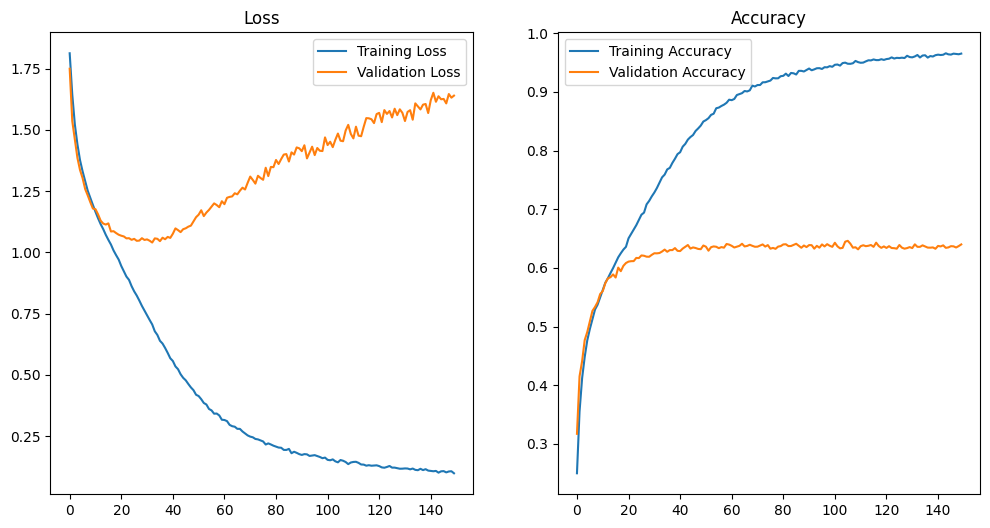

In [25]:
import pickle
import matplotlib.pyplot as plt

# Load the training history from the pickle file
with open('model_and_its_detail/training_history.pkl', 'rb') as history_file:
    history = pickle.load(history_file)

# Access loss and accuracy values
loss = history['loss']
val_loss = history['val_loss']
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

# Plot the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

In [26]:
import cv2
import numpy as np

# Load your image
test_image = "8.jpg"

# Load the image with OpenCV
img = cv2.imread(test_image, cv2.IMREAD_GRAYSCALE)

# Resize the image to match your model's input size
img = cv2.resize(img, (48, 48))

# Reshape the image to match the input shape of (1, 48, 48, 1)
img = img.reshape(1, 48, 48, 1)

# Normalize the pixel values if necessary (in your case, you've divided by 255)
img = img / 255.0

In [27]:
# test_image = "8.jpg"
# img=load_img(test_image,grayscale=True)
# img=np.array(img)
# img= img/255.0
# img=img.reshape(1,48,48,1)

1/1 [==============================] - 0s 100ms/step
model prediction is  disgust


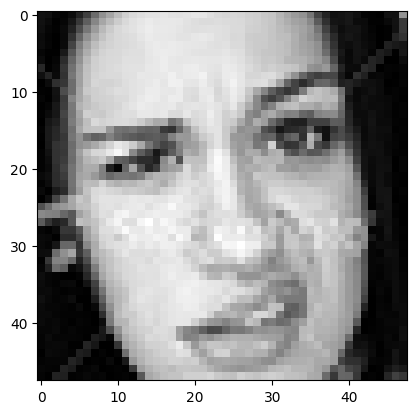

In [28]:
label=['angry','disgust','fear','happy','neutral','sad','surprise']
pred=model.predict(img)
pred_label=label[pred.argmax()]
print("model prediction is ",pred_label)

reshaped_img = img.reshape(48, 48)
plt.imshow(reshaped_img, cmap='gray')

In [29]:
# import cv2
# import os

# # Load the pre-trained face detection model
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# # Load the image
# image_path = '8.jpg'
# img = cv2.imread(image_path)

# # Convert the image to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Detect faces in the image
# faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# # If faces are detected, crop and save each one
# for i, (x, y, w, h) in enumerate(faces):
#     face = img[y:y+h, x:x+w]
#     face_filename = f'face_{i}.jpg'
#     cv2.imwrite(face_filename, face)

#     # Display and save the cropped face
#     cv2.imshow(f'Face {i}', face)

# # Wait for a key press and then close all windows
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [30]:
from keras.models import load_model
import time

def predict():
    global pred_label
    i=0
    path ="C:/Users/prajw/Downloads/sc.jpg"
    loaded_model = load_model('C:/Users/prajw/Downloads/music/model_and_its_detail/complete_model.h5')
    print(path)
    while(True):
        time.sleep(12)
        if i ==0:
            test_image=path
        test_image = path
        img = cv2.imread(test_image, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (48, 48))
        img = img.reshape(1, 48, 48, 1)
        img = img / 255.0
        label=['angry','disgust','fear','happy','neutral','sad','surprise']
        pred=loaded_model.predict(img)
        pred_label=label[pred.argmax()]
        print("model prediction is ",pred_label)
        path=path + " ("+str(i)+").jpg"        
        i=i+1
        path = f"C:/Users/prajw/Downloads/sc ({i}).jpg"
        print(path," ",test_image)
        

predict()

C:/Users/prajw/Downloads/sc.jpg


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
import time
i=0
path ="C:/Users/prajw/Downloads/sc"
while(True):
    time.sleep(12)
    path=path + " ("+str(i)+").jpg"
    print(path)
    i=i+1
